# Part 2: Convolutional Neural Network


## B) FC1 and FC2 layers in the VGG-19 

<i style="color:green"> Required libraries are imported </i>

In [ ]:
from __future__ import print_function, division
import os
import time
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [1]:

import numpy as np
import pandas as pd

import os

import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from torch import nn 
for dirname, _, filenames in os.walk('/content/drive/MyDrive/ml_final/raw-img'):
    for filename in filenames:
        path, folder = os.path.split(dirname)

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\ProgramData\Anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [ ]:
train_on_gpu = torch.cuda.is_available()
data_transform1 = transforms.Compose([transforms.RandomRotation(45),
                                     transforms.RandomRotation(30),
                                     transforms.RandomResizedCrop(1080),
                                     transforms.Resize(512),
                                     transforms.Resize(224),
                                     transforms.RandomRotation(45),
                                      transforms.ToTensor()])

data_transform2 = transforms.Compose<i style="color:green"> Getting foldernames from dataset </i>([transforms.RandomHorizontalFlip(),
                                     transforms.RandomResizedCrop(1080),
                                     transforms.Resize(224),
                                     transforms.RandomRotation(45),
                                      transforms.RandomRotation(35),
                                      transforms.ToTensor()])

<i style="color:green"> Getting foldernames from dataset </i>

In [ ]:
<i style="color:green"> Getting foldernames from dataset </i>from torch.utils.data import Subset, ConcatDataset , DataLoader
dataset1 = datasets.ImageFolder(path,transform=data_transform1)
dataset2 = datasets.ImageFolder(path,transform=data_transform2)
print(type(dataset1))
#master=datasets.ImageFolder(path,transform=data_transform1)
maxlen=750
for l, cls in enumerate(dataset1.classes):
    if l == 0 :
        idx = [i for i in range(len(dataset1) ) if dataset1.imgs[i][1] == dataset1.class_to_idx[dataset1.classes[l]]]
        subset = Subset(dataset1, idx)
        master= Subset(subset,idx [:maxlen])
        subset = Subset(dataset2, idx[:maxlen])
        master= ConcatDataset((master, subset))
        
        print(len(master))
    else : 
        idx = [i for i in range(len(dataset1) ) if dataset1.imgs[i][1] == dataset1.class_to_idx[dataset1.classes[l]]]
        
        subset = Subset(dataset1, idx[:maxlen])
        master= ConcatDataset((master, subset))
        subset = Subset(dataset2, idx[:maxlen])
        master= ConcatDataset((master, subset))
        print(len(master))
        #print(len(master))

<class 'torchvision.datasets.folder.ImageFolder'>
1500
3000
4500
6000
7500
9000
10500
12000
13500
15000


In [ ]:
valid_size = 0.1
test_size = 0.1
num_train = len(master)
indices = list(range(num_train))
np.random.shuffle(indices)
valid_split = int(np.floor((valid_size) * num_train))
test_split = int(np.floor((valid_size+test_size) * num_train))
valid_idx, test_idx, train_idx = indices[:valid_split], indices[valid_split:test_split], indices[test_split:]

num_workers = 6
batch_size= 60
disimage = 20
#data = torch.utils.data.DataLoader(master, batch_size=batch_size, num_workers=num_workers)

train_loader = Subset(master, train_idx)
valid_loader = Subset(master,valid_idx )
test_loader = Subset(master,test_idx )


train_loader =torch.utils.data.DataLoader(train_loader, batch_size=batch_size, num_workers=num_workers)
valid_loader =torch.utils.data.DataLoader(valid_loader, batch_size=batch_size, num_workers=num_workers)
test_loader =torch.utils.data.DataLoader(test_loader, batch_size=batch_size, num_workers=num_workers)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


### Definition of Labels

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


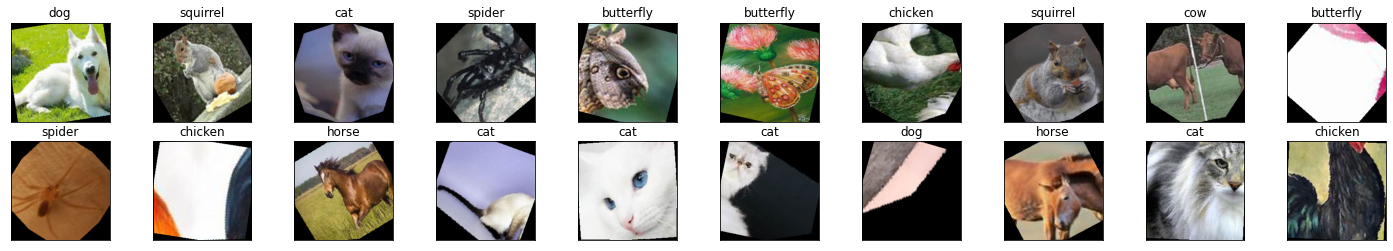

In [ ]:
### Definition of Labelsclasses = ["cane", "cavallo", "elefante", "farfalla", "gallina", "gatto", "mucca", "pecora","ragno", "scoiattolo" ]

translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly",
             "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", 
             "ragno": "spider", "scoiattolo": "squirrel" }

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(disimage):
    ax = fig.add_subplot(2, disimage/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(translate[classes[labels[idx]]])

In [ ]:
input_shape = 224
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]

#data transformation
data_transforms = {
   'train': transforms.Compose([
       transforms.CenterCrop(input_shape),
       transforms.ToTensor(),
       transforms.Normalize(mean, std)
   ]),
   'validation': transforms.Compose([
       transforms.CenterCrop(input_shape),
       transforms.ToTensor(),
       transforms.Normalize(mean, std)
   ]),
}

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


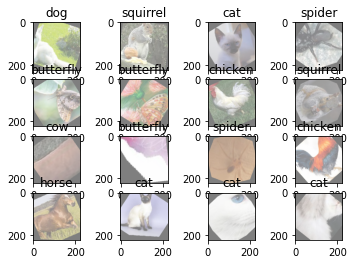

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
rows = 4
columns = 4
fig=plt.figure()
for i in range(16):
   fig.add_subplot(rows, columns, i+1)
   plt.title(translate[classes[labels[i]]])
   img = images[i].numpy().transpose((1, 2, 0))
   img = std * img + mean
   plt.imshow(img)
plt.show()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
len(train_loader)

200

### Implementing VGG19 Algorithm and Freezing Layers which we don't use

In [ ]:
## Load the model based on VGG19
vgg_based = torchvision.models.vgg19(pretrained=True)

## freeze the layers
for param in vgg_based.parameters():
   param.requires_grad = False

# Modify the last layer
number_features = vgg_based.classifier[6].in_features
features = list(vgg_based.classifier.children())[:-1] # Remove last layer
features.extend([torch.nn.Linear(number_features, len(classes))])
vgg_based.classifier = torch.nn.Sequential(*features)

vgg_based = vgg_based.to(device)

print(vgg_based)

criterion = torch.nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(vgg_based.parameters(), lr=0.001, momentum=0.9)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

### Definition of Train function

In [ ]:
### Definition of Train functiondef train_model(model, criterion, optimizer, num_epochs=25):
   since = time.time()

   for epoch in range(num_epochs):
       print('Epoch {}/{}'.format(epoch, num_epochs - 1))
       print('-' * 10)

       #set model to trainable
       # model.train()

       train_loss = 0

       # Iterate over data.
       for i, data in enumerate(train_loader):
           inputs , labels = data
           inputs = inputs.to(device)
           labels = labels.to(device)
           #print("labels : ",labels)
          
           optimizer.zero_grad()
          
           with torch.set_grad_enabled(True):
               outputs  = model(inputs)
               loss = criterion(outputs, labels)

           loss.backward()
           optimizer.step()

           train_loss += loss.item() * inputs.size(0)

           print('{} Loss: {:.4f}'.format(
               'train', train_loss / len(train_loader)))
          
   time_elapsed = time.time() - since
   print('Training complete in {:.0f}m {:.0f}s'.format(
       time_elapsed // 60, time_elapsed % 60))

   return model
def visualize_model(model, num_images=6):
   was_training = model.training
   model.eval()
   images_so_far = 0
   fig = plt.figure()
   global pred_false
   global pred_true
   pred_false =0
   pred_true = 0



   

   with torch.no_grad():
       for i, (inputs, labels) in enumerate(test_loader):
           inputs = inputs.to(device)
           labels = labels.to(device)

           outputs = model(inputs)
           _, preds = torch.max(outputs, 1)

           for j in range(inputs.size()[0]):
               images_so_far += 1
               ax = plt.subplot(num_images//2, 2, images_so_far)
               ax.axis('off')
               ax.set_title('predicted: {} truth: {}'.format(translate[classes[preds[j]]], translate[classes[labels[j]]]))

               if (classes[preds[j]]== classes[labels[j]]):
                 pred_true +=1

               else:
                 pred_false+=1


               img = inputs.cpu().data[j].numpy().transpose((1, 2, 0))
               img = std * img + mean
               ax.imshow(img)

               if images_so_far == num_images:
                   model.train(mode=was_training)
                   return
       print("predictoins True : ",pred_true,"\nPredictions False :", pred_false)
       model.train(mode=was_training)
       


### Training Model (VGG19)

Epoch 0/24
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Görüntülenen çıkış son 5000 satıra kısaltıldı.
train Loss: 28.2335
train Loss: 28.7207
train Loss: 29.2745
train Loss: 29.8142
train Loss: 30.3643
train Loss: 30.8768
train Loss: 31.4384
train Loss: 31.9790
train Loss: 32.4868
train Loss: 32.9620
train Loss: 33.4675
train Loss: 33.9478
train Loss: 34.4574
train Loss: 34.9586
train Loss: 35.4514
train Loss: 35.9473
train Loss: 36.4655
train Loss: 36.9661
train Loss: 37.4417
train Loss: 37.9483
train Loss: 38.5024
train Loss: 38.9395
train Loss: 39.4522
train Loss: 39.9406
train Loss: 40.4173
train Loss: 40.9756
train Loss: 41.4826
train Loss: 41.9184
train Loss: 42.4640
train Loss: 42.9268
train Loss: 43.4466
train Loss: 43.9317
train Loss: 44.3818
train Loss: 44.8764
train Loss: 45.3835
train Loss: 45.8686
train Loss: 46.4160
train Loss: 46.8765
train Loss: 47.3840
train Loss: 47.9025
train Loss: 48.3607
train Loss: 48.8826
train Loss: 49.3926
train Loss: 49.8455
train Loss: 50.3453
train Loss: 50.8135
train Loss: 51.2674
train Loss: 5

NameError: ignored

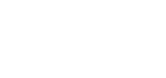

In [ ]:
vgg_based = train_model(vgg_based, criterion, optimizer_ft, num_epochs=25)

visualize_model(vgg_based)

plt.show()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


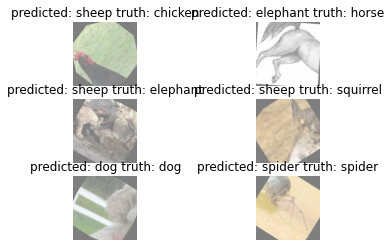

In [ ]:
visualize_model(vgg_based)

plt.show()

In [ ]:
pred_true

2

In [ ]:
pred_false

4

In [ ]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.001
optimizer = optim.SGD(vgg_based.parameters(), lr=0.001)

### Implemention of Test function

In [ ]:
### Implemention of Test functiondef seq (model, df, name ): 
    train_loss = 0.0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    for batch_i, (data, target) in enumerate(df):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
            model.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        if name == 'train': 
            loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss 
        train_loss += loss.item()
        _, pred = torch.max(output, 1) 
        # compare predictions to true label
        correct_tensor = pred.eq(target.data.view_as(pred))
        correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
        for i in range(len(target.data)):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1
        
    return class_correct, class_total, train_loss

In [ ]:
def printdata(class_correct, class_total, train_loss, epoch, name, df ): 
    print(f' loss: %.8f \t{name} Accuracy (Overall): %2d%% (%2d/%2d)' %(
        train_loss / len(df), 100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))
    if ((epoch+1) % 5 == 0 or epoch == 1):
        for i in range(10):
            if class_total[i] > 0:
                print(f'{name} Accuracy of %5s: %2d%% (%2d/%2d)' % (
                translate[classes[i]], 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))

In [ ]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
vgg_based.eval()
class_correct, class_total, train_loss= seq(vgg_based, test_loader, 'test')
printdata(class_correct, class_total, train_loss, 1, 'test', test_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


 loss: 1.22225365 	test Accuracy (Overall): 57% (867/1500)
test Accuracy of   dog: 54% (77/141)
test Accuracy of horse: 42% (66/157)
test Accuracy of elephant: 51% (79/154)
test Accuracy of butterfly: 77% (121/157)
test Accuracy of chicken: 55% (76/136)
test Accuracy of   cat: 62% (93/149)
test Accuracy of   cow: 45% (67/148)
test Accuracy of sheep: 64% (107/165)
test Accuracy of spider: 78% (114/145)
test Accuracy of squirrel: 45% (67/148)


We used the VGG19 artificial neural network in part B of the 2nd part of the project. Unlike part A, we only trained certain layers and got a different test result. When we examined the results, we obtained a much more balanced score compared to the A part.

Accuracy of dog: 54% (77/141) <br>
Accuracy of horses: 42% (66/157) <br>
Accuracy of elephant: 51% (79/154) <br>
Accuracy of butterfly: 77% (121/157) <br>
Accuracy of chicken: 55% (76/136) <br>
Accuracy of cat: 62% (93/149) <br>
Accuracy of cows: 45% (67/148) <br>
Accuracy of sheep: 64% (107/165) <br>
Accuracy of spider: 78% (114/145) <br>
Accuracy of squirrel: 45% (67/148) <br>

We have achieved higher accuracy values in the butterfly and spider classes compared to the others, and there is no obvious decrease in the other classes. The reason for this is that we did not cause overfitting by working with more classes than necessary and we obtained a healthier test result.